In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)


In [45]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [47]:
# Dimension of the dataset
print(np.shape(df))

(506, 14)


In [49]:
# Let's summarize the data to see the distribution of data
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

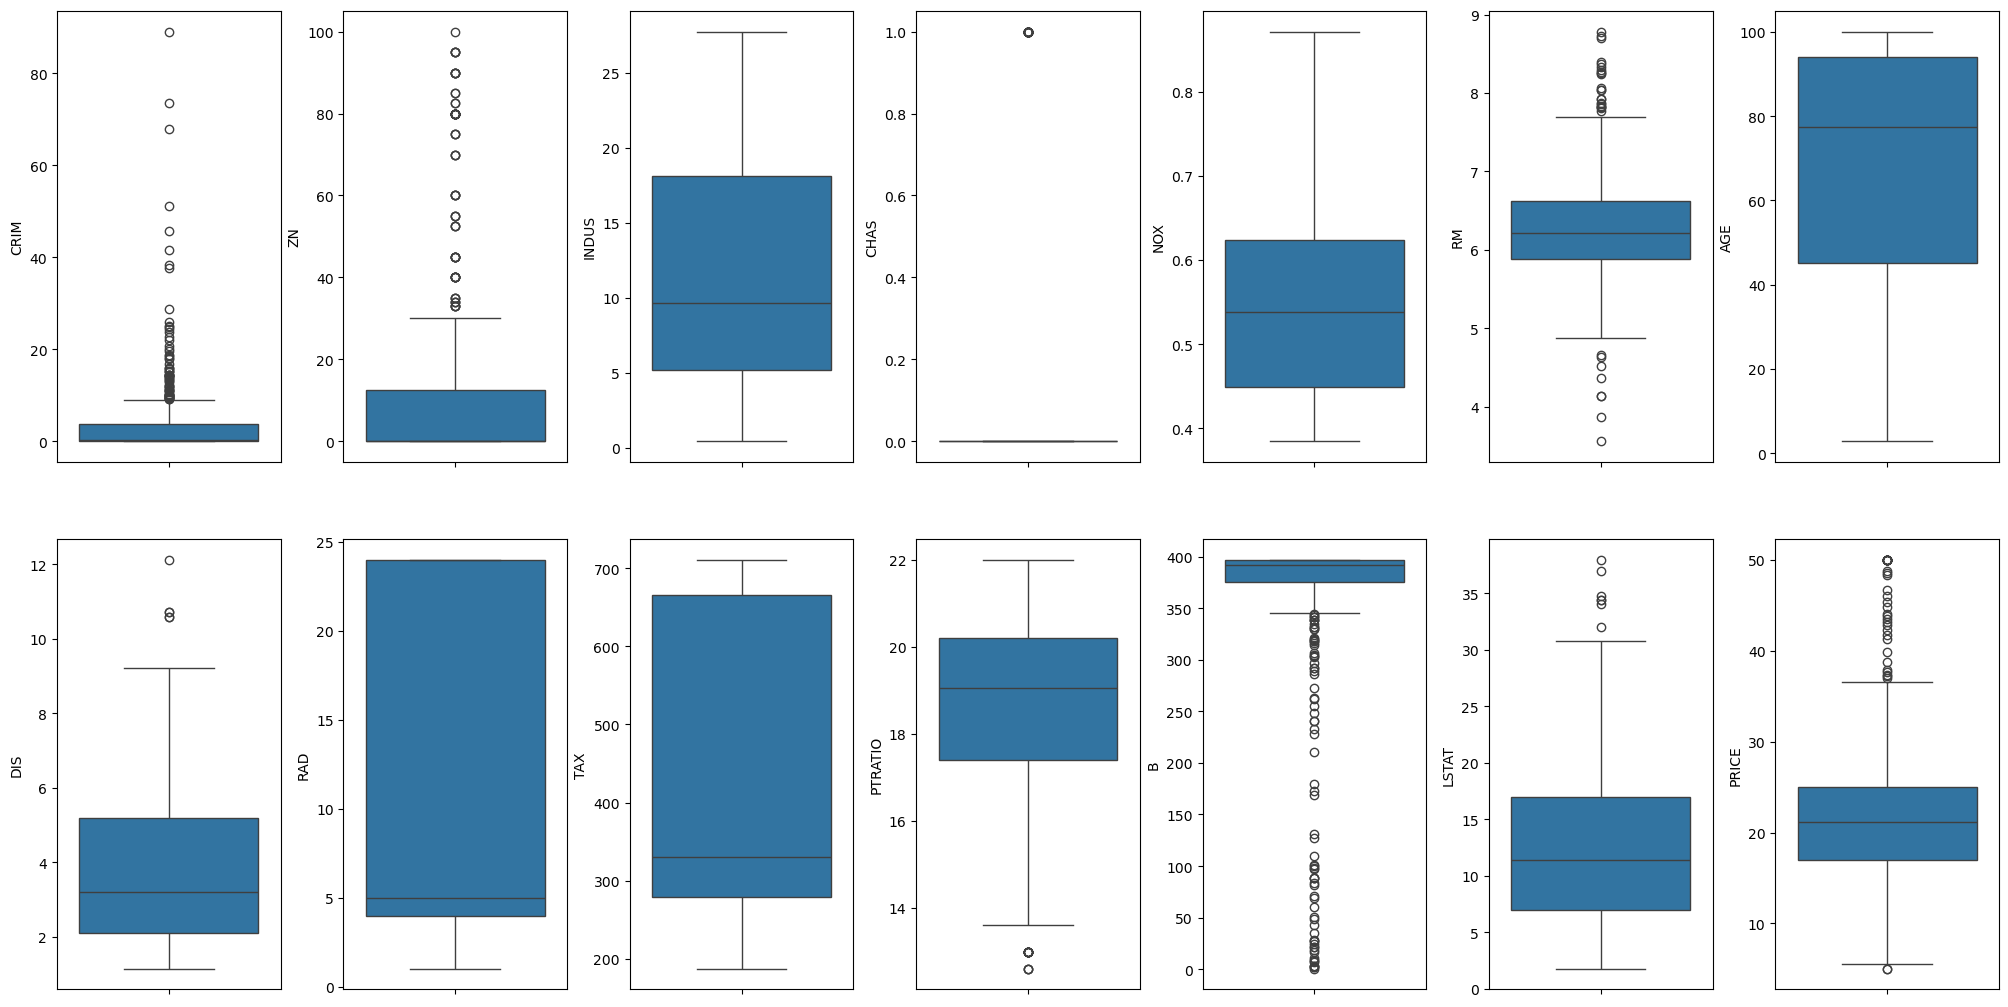

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [53]:
for k, v in df.items():
    if pd.api.types.is_numeric_dtype(v):
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        iqr = q3 - q1
        print(f"{k}: Q1 = {q1}, Q3 = {q3}, IQR = {iqr}")
    else:
        print(f"Skipped column {k} (non-numeric)")


CRIM: Q1 = 0.08204499999999999, Q3 = 3.6770825, IQR = 3.5950375
ZN: Q1 = 0.0, Q3 = 12.5, IQR = 12.5
INDUS: Q1 = 5.19, Q3 = 18.1, IQR = 12.91
CHAS: Q1 = 0.0, Q3 = 0.0, IQR = 0.0
NOX: Q1 = 0.449, Q3 = 0.624, IQR = 0.175
RM: Q1 = 5.8854999999999995, Q3 = 6.6235, IQR = 0.7380000000000004
AGE: Q1 = 45.025, Q3 = 94.07499999999999, IQR = 49.04999999999999
DIS: Q1 = 2.100175, Q3 = 5.1884250000000005, IQR = 3.0882500000000004
RAD: Q1 = 4.0, Q3 = 24.0, IQR = 20.0
TAX: Q1 = 279.0, Q3 = 666.0, IQR = 387.0
PTRATIO: Q1 = 17.4, Q3 = 20.2, IQR = 2.8000000000000007
B: Q1 = 375.3775, Q3 = 396.225, IQR = 20.847500000000025
LSTAT: Q1 = 6.949999999999999, Q3 = 16.955000000000002, IQR = 10.005000000000003
PRICE: Q1 = 17.025, Q3 = 25.0, IQR = 7.975000000000001


In [15]:
df = df[~(df['PRICE'] >= 35.0)]
print(np.shape(df))

(507, 14)


In [17]:
#Looking at the data with names and target variable
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,"CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRA...","MEDV,,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#Shape of the data
print(df.shape)

(507, 14)


In [21]:
#Checking the null values in the dataset
df.isnull().sum()

CRIM         0
ZN         506
INDUS      507
CHAS       507
NOX        507
RM         507
AGE        507
DIS        507
RAD        507
TAX        507
PTRATIO    507
B          507
LSTAT      507
PRICE      507
dtype: int64

In [23]:
#Checking the statistics of the data
df.describe()

,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     507 non-null    object 
 1   ZN       1 non-null      object 
 2   INDUS    0 non-null      float64
 3   CHAS     0 non-null      float64
 4   NOX      0 non-null      float64
 5   RM       0 non-null      float64
 6   AGE      0 non-null      float64
 7   DIS      0 non-null      float64
 8   RAD      0 non-null      float64
 9   TAX      0 non-null      float64
 10  PTRATIO  0 non-null      float64
 11  B        0 non-null      float64
 12  LSTAT    0 non-null      float64
 13  PRICE    0 non-null      float64
dtypes: float64(12), object(2)
memory usage: 55.6+ KB


float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: PRICE, dtype: float64


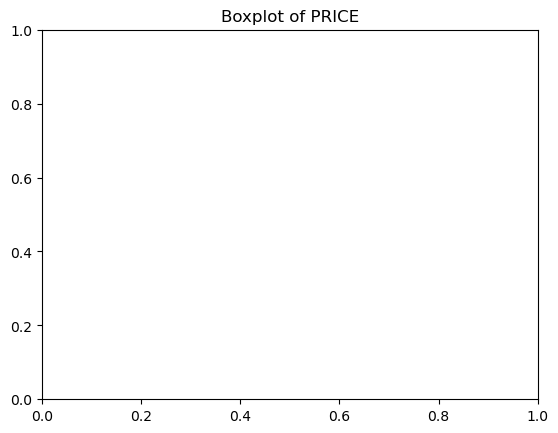

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Check PRICE column
print(df["PRICE"].dtype)
print(df["PRICE"].head())

# Step 2: Force conversion to numeric and drop NaNs
df["PRICE"] = pd.to_numeric(df["PRICE"], errors="coerce")
df_clean = df.dropna(subset=["PRICE"])

# Step 3: Plot boxplot
sns.boxplot(y=df_clean["PRICE"])
plt.title("Boxplot of PRICE")
plt.show()


ValueError: List of boxplot statistics and `positions` values must have same the length

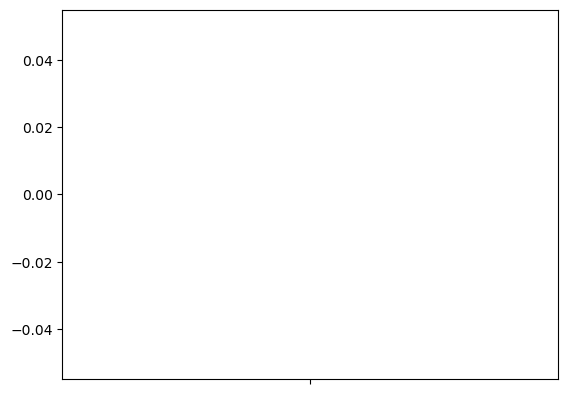

In [35]:
#Distribution using box plot
sns.boxplot(df.PRICE)

In [37]:
#checking Correlation of the data 
correlation = df.corr()
correlation.loc['PRICE']

ValueError: could not convert string to float: 'CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT.'

NameError: name 'correlation' is not defined

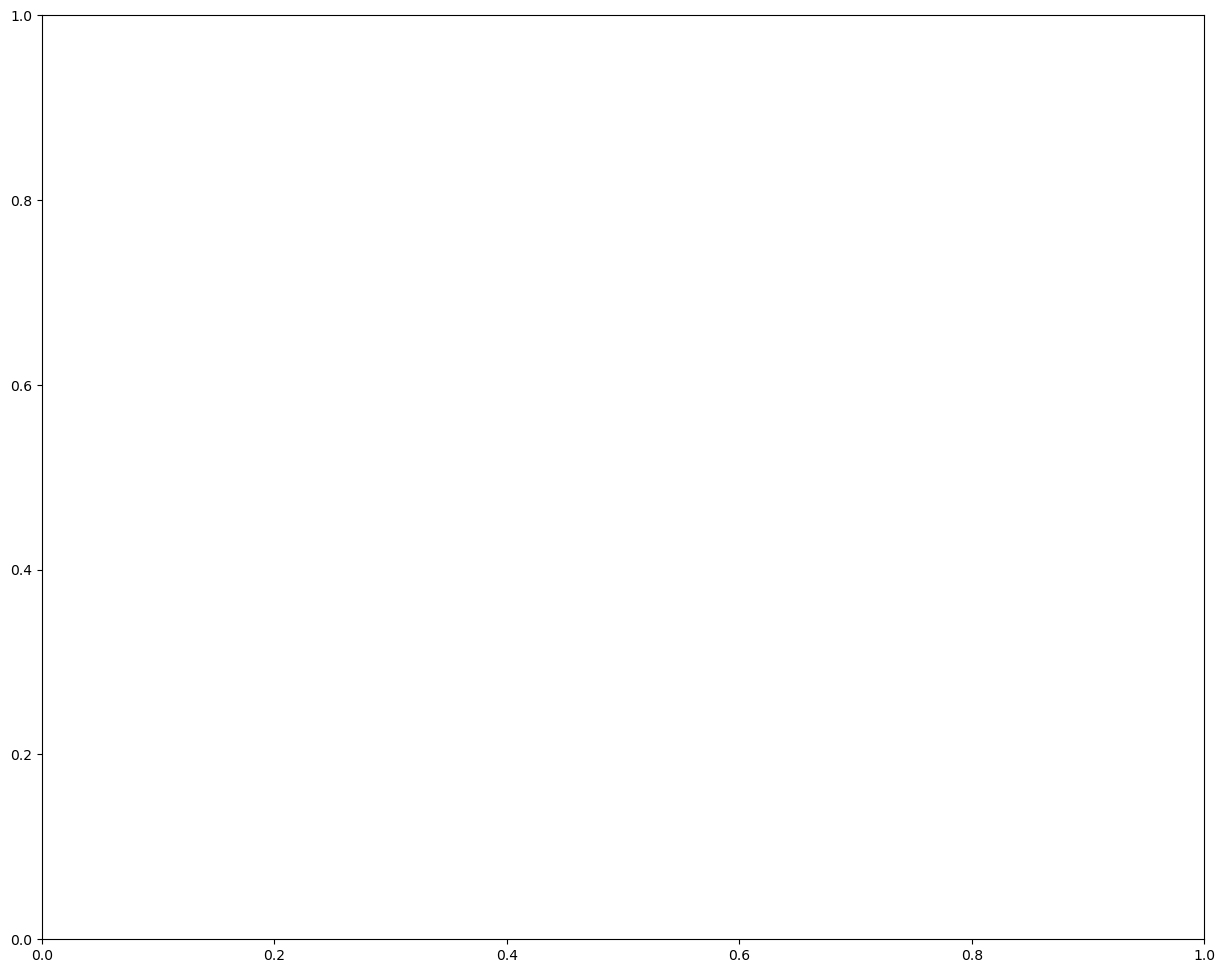

In [53]:
# plotting the heatmap
import matplotlib.pyplot as plt
fig,axes = plt.subplots(figsize=(15,12))
sns.heatmap(correlation,square = True,annot = True)

By looking at the correlation plot LSAT is negatively correlated with -0.75 and RM is positively correlated to the price and PTRATIO is correlated negatively with -0.51

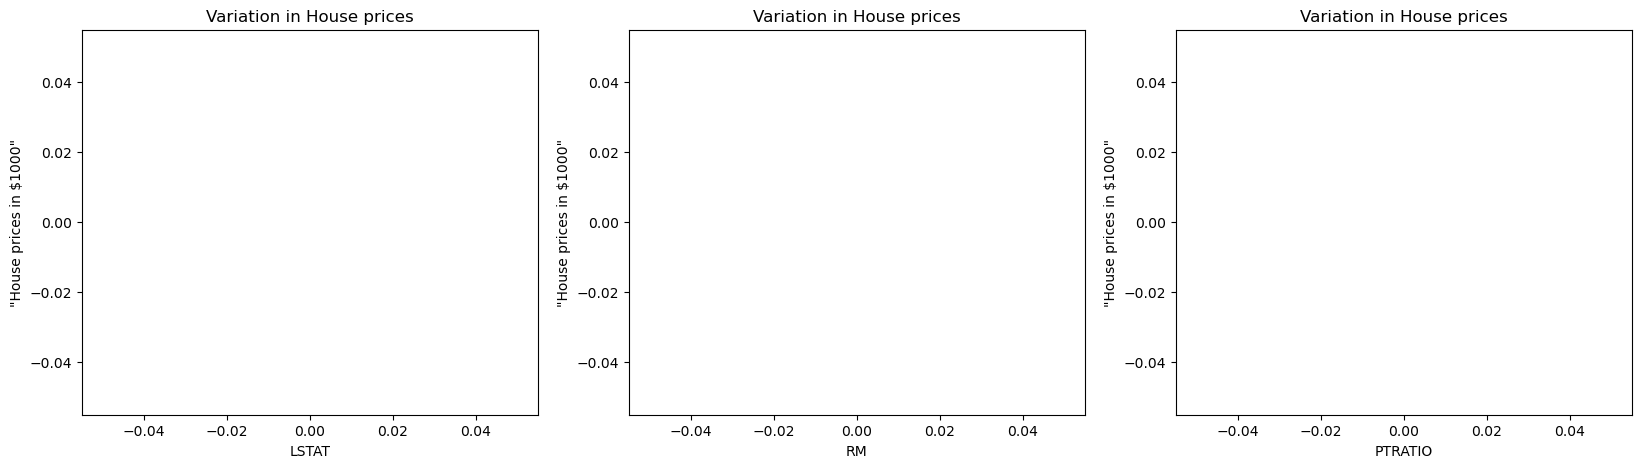

In [56]:
# Checking the scatter plot with the most correlated features
plt.figure(figsize = (20,5))
features = ['LSTAT','RM','PTRATIO']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = df.PRICE
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

In [58]:
#X = data[['LSTAT','RM','PTRATIO']]
X = df.iloc[:,:-1]
y= df.PRICE

In [60]:
# Splitting the data into train and test for building the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

In [62]:
#Linear Regression 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [64]:
#Fitting the model
regressor.fit(X_train,y_train)

ValueError: could not convert string to float: '9.2323,0,18.1,0,0.631,6.216,100,1.1691,24,666,20.2,366.15,9.53,50,1,,'

In [66]:
#Prediction on the test dataset
y_pred = regressor.predict(X_test)

ValueError: could not convert string to float: '5.82401,0,18.1,0,0.532,6.242,64.7,3.4242,24,666,20.2,396.9,10.74,23,0,,'

In [68]:
# Predicting RMSE the Test set results
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

NameError: name 'y_pred' is not defined

In [70]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

NameError: name 'y_pred' is not defined

In [72]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ValueError: could not convert string to float: '9.2323,0,18.1,0,0.631,6.216,100,1.1691,24,666,20.2,366.15,9.53,50,1,,'

In [74]:
#Creating the neural network model
import keras
from keras.layers import Dense, Activation,Dropout
from keras.models import Sequential

model = Sequential()

model.add(Dense(128,activation  = 'relu',input_dim =13))
model.add(Dense(64,activation  = 'relu'))
model.add(Dense(32,activation  = 'relu'))
model.add(Dense(16,activation  = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

C:\Users\adity\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
model.fit(X_train, y_train, epochs = 100)

ValueError: could not convert string to float: '9.2323,0,18.1,0,0.631,6.216,100,1.1691,24,666,20.2,366.15,9.53,50,1,,'

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

In [ ]:
# Predicting RMSE the Test set results
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)